In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sklearn as skl
from scipy.fftpack import fft, ifft, dct, idct

In [2]:
cryptos = ['TRX-USD', 'EOS-USD', 'XLM-USD', 'ADA-USD']
raw_dfs = []
T = 24 

def getDetails(data):
    for i in data:
        raw_dfs.append({
            "name":i,
            "data":pdr.DataReader( i, start='2020-5-1', end='2020-6-1', data_source='yahoo')['Open']
            })
    for x in raw_dfs:
        print(x.get("name"))
        print(x.get("data").describe())
getDetails(cryptos)

TRX-USD
count    33.000000
mean      0.015332
std       0.000739
min       0.014039
25%       0.014857
50%       0.015119
75%       0.015910
max       0.017000
Name: Open, dtype: float64
EOS-USD
count    33.000000
mean      2.648496
std       0.136866
min       2.409130
25%       2.563335
50%       2.618231
75%       2.761601
max       2.945982
Name: Open, dtype: float64
XLM-USD
count    33.000000
mean      0.069534
std       0.003200
min       0.062795
25%       0.067549
50%       0.069407
75%       0.072364
max       0.075577
Name: Open, dtype: float64
ADA-USD
count    33.000000
mean      0.054879
std       0.008261
min       0.047696
25%       0.050423
50%       0.051744
75%       0.055265
max       0.080983
Name: Open, dtype: float64


<Figure size 432x288 with 0 Axes>

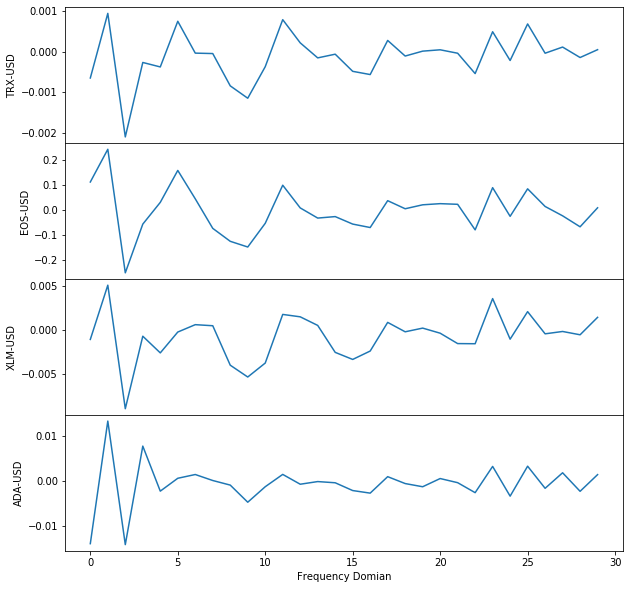

In [3]:
frequencies = []
def plotFreqs(data):
    plt.figure()
    f, axes = plt.subplots(len(data), sharex=True, gridspec_kw={'hspace': 0},)
    f.set_figheight(10)
    f.set_figwidth(10)
    for x in data:
        inputs = x.get("data").to_numpy()
        N = len(x)
        series = np.linspace( 0, N / T, N )
        y = dct(inputs, norm = 'ortho' )

        frequencies.append({
            'name' : x.get('name'),
            'frequencies' : y
        })

        axes[data.index(x)].plot(y[3:])
        axes[data.index(x)].set_ylabel(x.get("name"))
        axes[data.index(x)].set_xlabel('Frequency Domian')

plotFreqs(raw_dfs)

In [4]:
highFs = []

def extractHighFrequecies( data, percentage ):
    def extraction(n):
        if n > np.quantile(i.get("frequencies"), percentage):
            return n
        else:
            return 0

    for i in data:
        result = map(extraction, i.get("frequencies")) 
        highFs.append(list(result)) 
    print(highFs)
extractHighFrequecies(frequencies, 0.75)

[[0.08807433989970827, 0.0011581881955390065, 0.0022460842060088655, 0, 0.0009436618353490081, 0, 0, 0, 0.0007486351517174024, 0, 0, 0, 0, 0, 0.0007888197154806451, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0004906686527109167, 0, 0.0006834866312992304, 0, 0, 0, 0], [15.214450190714011, 0.3369276601933576, 0.4727703165519812, 0.11191111992665356, 0.24299291956254715, 0, 0, 0, 0.15831885849838961, 0, 0, 0, 0, 0, 0.09913417823109939, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.08927281291725192, 0, 0, 0, 0, 0, 0], [0.3994400320268256, 0.006427967331659155, 0.007400920279573574, 0, 0.005071008042395925, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0017416057846339093, 0.0014683259153139452, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.00354304017463823, 0, 0.002058041840200504, 0, 0, 0, 0], [0.31525331408136237, 0, 0.01953922000712442, 0, 0.013362918415700134, 0, 0.007802357591171626, 0, 0, 0, 0, 0, 0, 0, 0.0015135628926577994, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003288603728634219, 0, 0.003338319380947607, 0, 0.0018753491809954297, 

<Figure size 432x288 with 0 Axes>

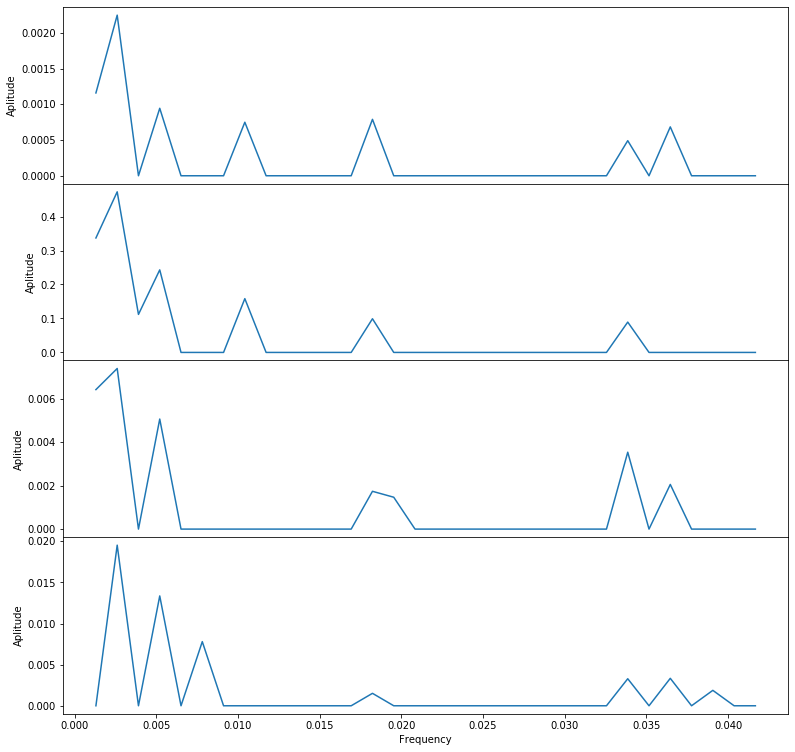

In [5]:
graphData = []
def plothighFs(data):
    plt.figure()
    N = len(data[0])
    f, axes = plt.subplots(len(data), sharex=True, gridspec_kw={'hspace': 0},)
    f.set_figheight(13)
    f.set_figwidth(13)
    series = np.linspace( 0,  1 / T , N )

    for i in data:
        li = axes[data.index(i)].plot(series[1:], i[1:])
        axes[data.index(i)].set_ylabel('Aplitude')
        axes[data.index(i)].set_xlabel('Frequency')
        graphData.append(li[0].get_data())
plothighFs(highFs)

In [6]:
# Here we create coordinates as (frequency, amplitude)
pairs = []
def getCoordinates(data):
    def combine(f, a):
        return [f, a]

    for x in data:        
        result = map(combine, x[0], x[1])
        pairs.append(list(result))
    return pairs
getCoordinates(graphData)

[[[0.0013020833333333333, 0.0011581881955390065],
  [0.0026041666666666665, 0.0022460842060088655],
  [0.00390625, 0.0],
  [0.005208333333333333, 0.0009436618353490081],
  [0.006510416666666666, 0.0],
  [0.0078125, 0.0],
  [0.009114583333333332, 0.0],
  [0.010416666666666666, 0.0007486351517174024],
  [0.01171875, 0.0],
  [0.013020833333333332, 0.0],
  [0.014322916666666666, 0.0],
  [0.015625, 0.0],
  [0.016927083333333332, 0.0],
  [0.018229166666666664, 0.0007888197154806451],
  [0.01953125, 0.0],
  [0.020833333333333332, 0.0],
  [0.022135416666666664, 0.0],
  [0.0234375, 0.0],
  [0.024739583333333332, 0.0],
  [0.026041666666666664, 0.0],
  [0.02734375, 0.0],
  [0.028645833333333332, 0.0],
  [0.029947916666666664, 0.0],
  [0.03125, 0.0],
  [0.03255208333333333, 0.0],
  [0.033854166666666664, 0.0004906686527109167],
  [0.03515625, 0.0],
  [0.03645833333333333, 0.0006834866312992304],
  [0.037760416666666664, 0.0],
  [0.0390625, 0.0],
  [0.04036458333333333, 0.0],
  [0.04166666666666666

<Figure size 432x288 with 0 Axes>

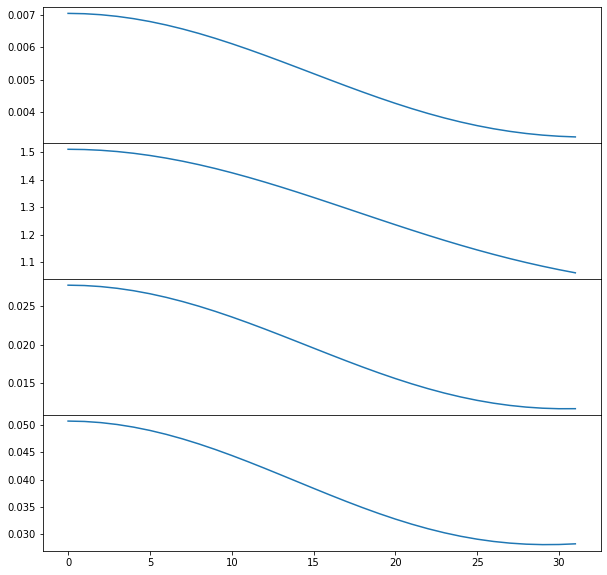

In [10]:
def plotSignals(data, raw_data):
    plt.figure()
    f, axes = plt.subplots(len(data), sharex=True, gridspec_kw={'hspace': 0}, )

    f.set_figheight(10)
    f.set_figwidth(10)

    N = len(raw_data[0].get('data'))
    series = np.linspace(0.0, N, len(data[0]))

    signals = []
    for r in data:
        def get(x):
            if x[1] == 0:
                return 0
            else:
                data = x[1] * np.cos(np.pi * x[0] * series)
                return data
        result = map(get, r)
        signals.append( list(result) )

    combinedSignals = []
    for i in signals:
        combinedSignals.append(sum(i))
            
    for i in raw_data:
        inputs = i.get("data").to_numpy()
        axes[raw_data.index(i)].plot(inputs)
        axes[raw_data.index(i)].set_ylabel(i.get("name"))
        axes[raw_data.index(i)].set_xlabel('Frequency Domian')

    combinedSignals = np.array(combinedSignals)
    for i in combinedSignals:
        axes[np.where(combinedSignals == i)[0][0]].plot(i)
        # axes[combinedSignals.index(i)].set_ylabel(i.get("name"))
        # axes[combinedSignals.index(i)].set_xlabel('Frequency Domian')
    

plotSignals(pairs, raw_dfs)

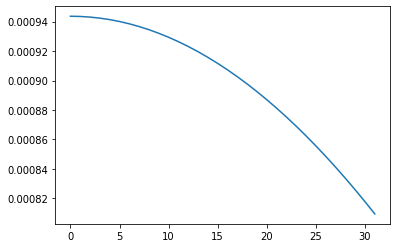

In [21]:
N = len(raw_dfs[0].get('data'))
series = np.linspace(0.0, N, len(pairs[0]))

signals = []
for r in pairs:
    def get(x):
        if x[1] == 0:
            return 0
        else:
            data = x[1] * np.cos(np.pi * x[0] * series)
            return data
    result = map(get, r)
    signals.append( list(result) )

combinedSignals = []
for i in signals:
    combinedSignals.append(sum(i))
plt.plot(signals[0][3])
# signals[3][1]

In [22]:
pairs

[[[0.0013020833333333333, 0.0011581881955390065],
  [0.0026041666666666665, 0.0022460842060088655],
  [0.00390625, 0.0],
  [0.005208333333333333, 0.0009436618353490081],
  [0.006510416666666666, 0.0],
  [0.0078125, 0.0],
  [0.009114583333333332, 0.0],
  [0.010416666666666666, 0.0007486351517174024],
  [0.01171875, 0.0],
  [0.013020833333333332, 0.0],
  [0.014322916666666666, 0.0],
  [0.015625, 0.0],
  [0.016927083333333332, 0.0],
  [0.018229166666666664, 0.0007888197154806451],
  [0.01953125, 0.0],
  [0.020833333333333332, 0.0],
  [0.022135416666666664, 0.0],
  [0.0234375, 0.0],
  [0.024739583333333332, 0.0],
  [0.026041666666666664, 0.0],
  [0.02734375, 0.0],
  [0.028645833333333332, 0.0],
  [0.029947916666666664, 0.0],
  [0.03125, 0.0],
  [0.03255208333333333, 0.0],
  [0.033854166666666664, 0.0004906686527109167],
  [0.03515625, 0.0],
  [0.03645833333333333, 0.0006834866312992304],
  [0.037760416666666664, 0.0],
  [0.0390625, 0.0],
  [0.04036458333333333, 0.0],
  [0.04166666666666666

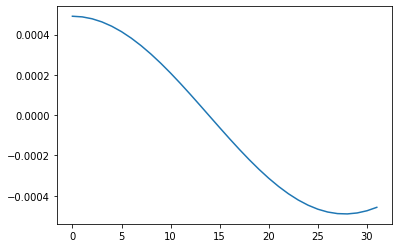

In [25]:
sign = 0.0004906686527109167 * np.cos(np.pi * 0.033854166666666664 * series)
plt.plot(sign)


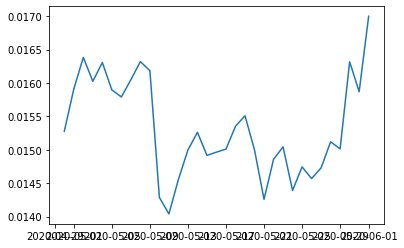

In [26]:
plt.plot(raw_dfs[0].get('data'))
plt.fig